## PDCM

In [1]:
import os
import json
import pandas as pd

base_dir = "/Users/xuenbei/Desktop/finalyearproject/PDCM/fitted_data"
subject_ids = [1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20]
rois = list(range(100))
experiments = ["PLCB", "LSD"]
output_csv = "/Users/xuenbei/Desktop/finalyearproject/statistical_tests/pdcm_all_data.csv"

metrics = [
    "mse", "nmse", "relative_error", "explained_variance",
    "pearson_corr", "cross_correlation", "coherence", "kl_divergence"
]

rows = []

for subject in subject_ids:
    for roi in rois:
        for exp in experiments:
            prefix = f"roi-{roi}-{exp}"
            folder = os.path.join(base_dir, f"sub-{subject:03d}")
            
            result_path = os.path.join(folder, f"{prefix}_results.json")
            metric_path = os.path.join(folder, f"{prefix}_metrics.json")
            baseline_param_path = os.path.join(folder, f"{prefix}_baseline_results.json")
            baseline_metric_path = os.path.join(folder, f"{prefix}_baseline_metrics.json")

            if not os.path.exists(result_path) or not os.path.exists(metric_path):
                continue

            try:
                # Load fitted results
                with open(result_path) as f:
                    result_data = json.load(f)
                fitted_params = result_data.get("final_parameters", {})
                fit_time = result_data.get("fit_time", None)
                final_loss = result_data.get("final_loss", None)
            
                # Load fitted metrics
                with open(metric_path) as f:
                    metric_data = json.load(f)
                    raw_metrics = metric_data.get("raw_csd_metrics", {})
                    norm_metrics = metric_data.get("normalised_csd_metrics", {})
            
                # Load baseline parameters 
                baseline_params = {}
                if os.path.exists(baseline_param_path):
                    with open(baseline_param_path) as f:
                        baseline_data = json.load(f)
                        baseline_params = baseline_data.get("final_parameters", {})
            
                baseline_raw = {}
                baseline_norm = {}
                if os.path.exists(baseline_metric_path):
                    with open(baseline_metric_path) as f:
                        base_metrics = json.load(f)
                        baseline_raw = base_metrics.get("raw_csd_metrics", {})
                        baseline_norm = base_metrics.get("normalised_csd_metrics", {})
            
                # Loop over all fitted parameters to create one row per parameter
                for param, value in fitted_params.items():
                    row = {
                        "subject": subject,
                        "experiment": exp,
                        "roi": roi,
                        "parameter": param,
                        "value": value,
                        "fit_time": fit_time,
                        "final_loss": final_loss,
                        f"baseline_{param}": baseline_params.get(param, None)
                    }
            
                    # Add fitted raw and norm metrics
                    for m in metrics:
                        row[f"{m}_raw"] = raw_metrics.get(m, None)
                        row[f"{m}_norm"] = norm_metrics.get(m, None)
                        row[f"baseline_{m}_raw"] = baseline_raw.get(m, None)
                        row[f"baseline_{m}_norm"] = baseline_norm.get(m, None)
            
                    rows.append(row)
            
            except Exception as e:
                print(f"Error in sub-{subject:03d}, ROI {roi}, {exp}: {e}")


df = pd.DataFrame(rows)


ordered_cols = ["subject", "experiment", "roi", "parameter", "value"]
ordered_cols += [f"baseline_{param}" for param in fitted_params.keys()]
ordered_cols += [f"{m}_raw" for m in metrics] + [f"{m}_norm" for m in metrics]
ordered_cols += [f"baseline_{m}_raw" for m in metrics] + [f"baseline_{m}_norm" for m in metrics]
ordered_cols += ["fit_time", "final_loss"]

ordered_cols = [col for col in ordered_cols if col in df.columns]

df = df[ordered_cols]
df.to_csv(output_csv, index=False)
df


subject experiment  roi parameter      value  baseline_phi  \
0            1       PLCB    0       phi   1.997657           1.5   
1            1       PLCB    0    varphi   0.461947           NaN   
2            1       PLCB    0       chi   0.518499           NaN   
3            1       PLCB    0       mtt   3.535785           NaN   
4            1       PLCB    0       tau  22.869062           NaN   
...        ...        ...  ...       ...        ...           ...   
38635       20        LSD   99   alpha_e  18.828115           NaN   
38636       20        LSD   99    beta_e   1.076012           NaN   
38637       20        LSD   99     alpha   0.215089           NaN   
38638       20        LSD   99        E0   0.389697           NaN   
38639       20        LSD   99       mtt   3.956085           NaN   

       baseline_varphi  baseline_chi  baseline_tau  baseline_sigma  ...  \
0                  NaN           NaN           NaN             NaN  ...   
1                  0.6           NaN           NaN             NaN  ...   
2                  NaN           0.6           NaN             NaN  ...   
3                  NaN           NaN           NaN             NaN  ...   
4                  NaN           NaN           4.0             NaN  ...   
...                ...           ...           ...             ...  ...   
38635              NaN           NaN           NaN             NaN  ...   
38636              NaN           NaN           NaN             NaN  ...   
38637              NaN           NaN           NaN             NaN  ...   
38638              NaN           NaN           NaN             NaN  ...   
38639              NaN           NaN           NaN             NaN  ...   

       baseline_mse_norm  baseline_nmse_norm  baseline_relative_error_norm  \
0               1.435081            0.613324                       0.78315   
1               1.435081            0.613324                       0.78315   
2               1.435081            0.613324                       0.78315   
3               1.435081            0.613324                       0.78315   
4               1.435081            0.613324                       0.78315   
...                  ...                 ...                           ...   
38635           1.860324            1.179765                       1.08617   
38636           1.860324            1.179765                       1.08617   
38637           1.860324            1.179765                       1.08617   
38638           1.860324            1.179765                       1.08617   
38639           1.860324            1.179765                       1.08617   

       baseline_explained_variance_norm  baseline_pearson_corr_norm  \
0                              0.409260                    0.373811   
1                              0.409260                    0.373811   
2                              0.409260                    0.373811   
3                              0.409260                    0.373811   
4                              0.409260                    0.373811   
...                                 ...                         ...   
38635                         -0.100009                    0.050383   
38636                         -0.100009                    0.050383   
38637                         -0.100009                    0.050383   
38638                         -0.100009                    0.050383   
38639                         -0.100009                    0.050383   

       baseline_cross_correlation_norm  baseline_coherence_norm  \
0                             0.373811                 0.412340   
1                             0.373811                 0.412340   
2                             0.373811                 0.412340   
3                             0.373811                 0.412340   
4                             0.373811                 0.412340   
...                                ...                      ...   
38635             

In [7]:
df = pd.read_csv("/Users/xuenbei/Desktop/finalyearproject/statistical_tests/pdcm_all_data.csv")


## spDCM

In [2]:
import os
import json
import pandas as pd

base_dir = "/Users/xuenbei/Desktop/finalyearproject/spDCM/fitted_data"
subject_ids = [1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20]
rois = list(range(100))
experiments = ["PLCB", "LSD"]
output_csv = "/Users/xuenbei/Desktop/finalyearproject/statistical_tests/spdcm_all_data.csv"

metrics = [
    "mse", "nmse", "relative_error", "explained_variance",
    "pearson_corr", "cross_correlation", "coherence", "kl_divergence"
]

rows = []

for subject in subject_ids:
    for roi in rois:
        for exp in experiments:
            prefix = f"roi-{roi}-{exp}"
            folder = os.path.join(base_dir, f"sub-{subject:03d}")
            
            result_path = os.path.join(folder, f"{prefix}_results.json")
            metric_path = os.path.join(folder, f"{prefix}_metrics.json")
            baseline_param_path = os.path.join(folder, f"{prefix}_baseline_results.json")
            baseline_metric_path = os.path.join(folder, f"{prefix}_baseline_metrics.json")

            if not os.path.exists(result_path) or not os.path.exists(metric_path):
                continue

            try:
                with open(result_path) as f:
                    result_data = json.load(f)
                fitted_params = result_data.get("final_parameters", {})
                fit_time = result_data.get("fit_time", None)
                final_loss = result_data.get("final_loss", None)

                with open(metric_path) as f:
                    metric_data = json.load(f)
                    raw_metrics = metric_data.get("raw_csd_metrics", {})
                    norm_metrics = metric_data.get("normalised_csd_metrics", {})

                baseline_params = {}
                if os.path.exists(baseline_param_path):
                    with open(baseline_param_path) as f:
                        baseline_data = json.load(f)
                        baseline_params = baseline_data.get("final_parameters", {})

                baseline_raw = {}
                baseline_norm = {}
                if os.path.exists(baseline_metric_path):
                    with open(baseline_metric_path) as f:
                        base_metrics = json.load(f)
                        baseline_raw = base_metrics.get("raw_csd_metrics", {})
                        baseline_norm = base_metrics.get("normalised_csd_metrics", {})
                
                if "A" in fitted_params and isinstance(fitted_params["A"], list):
                    try:
                        A_complex = complex(*fitted_params["A"][0][0])  # [real, imag]
                        A_real = A_complex.real
                        A_imag = A_complex.imag
                    except Exception:
                        A_real = None
                        A_imag = None
                
                    for param_name, value in [("A_real", A_real), ("A_imag", A_imag)]:
                        row = {
                            "subject": subject,
                            "experiment": exp,
                            "roi": roi,
                            "parameter": param_name,
                            "value": value,
                            "fit_time": fit_time,
                            "final_loss": final_loss,
                            f"baseline_{param_name}": None  
                        }
                        for m in metrics:
                            row[f"{m}_raw"] = raw_metrics.get(m, None)
                            row[f"{m}_norm"] = norm_metrics.get(m, None)
                            row[f"baseline_{m}_raw"] = baseline_raw.get(m, None)
                            row[f"baseline_{m}_norm"] = baseline_norm.get(m, None)
                
                        rows.append(row)
                
                for param, value in fitted_params.items():
                    if param == "A":
                        continue 
                
                    row = {
                        "subject": subject,
                        "experiment": exp,
                        "roi": roi,
                        "parameter": param,
                        "value": value,
                        "fit_time": fit_time,
                        "final_loss": final_loss,
                        f"baseline_{param}": baseline_params.get(param, None)
                    }
                
                    for m in metrics:
                        row[f"{m}_raw"] = raw_metrics.get(m, None)
                        row[f"{m}_norm"] = norm_metrics.get(m, None)
                        row[f"baseline_{m}_raw"] = baseline_raw.get(m, None)
                        row[f"baseline_{m}_norm"] = baseline_norm.get(m, None)
                
                    rows.append(row)


            except Exception as e:
                print(f"Error in sub-{subject:03d}, ROI {roi}, {exp}: {e}")

df = pd.DataFrame(rows)

ordered_cols = ["subject", "experiment", "roi", "parameter", "value"]
ordered_cols += [f"baseline_{param}" for param in fitted_params.keys()]
ordered_cols += [f"{m}_raw" for m in metrics] + [f"{m}_norm" for m in metrics]
ordered_cols += [f"baseline_{m}_raw" for m in metrics] + [f"baseline_{m}_norm" for m in metrics]
ordered_cols += ["fit_time", "final_loss"]

ordered_cols = [col for col in ordered_cols if col in df.columns]

df_spdcm = df[ordered_cols]
df_spdcm.to_csv(output_csv, index=False)
df_spdcm



subject experiment  roi parameter     value  baseline_varphi  \
0            1       PLCB    0    A_real -0.014753              NaN   
1            1       PLCB    0    A_imag  0.042681              NaN   
2            1       PLCB    0    varphi  0.804894              0.6   
3            1       PLCB    0       phi  1.364140              NaN   
4            1       PLCB    0       chi  0.544557              NaN   
...        ...        ...  ...       ...       ...              ...   
38995       20        LSD   99    beta_v  0.029796              NaN   
38996       20        LSD   99   alpha_e  0.758698              NaN   
38997       20        LSD   99    beta_e  0.338766              NaN   
38998       20        LSD   99     alpha  0.407068              NaN   
38999       20        LSD   99        E0  0.378840              NaN   

       baseline_phi  baseline_chi  baseline_mtt  baseline_tau  ...  \
0               NaN           NaN           NaN           NaN  ...   
1               NaN           NaN           NaN           NaN  ...   
2               NaN           NaN           NaN           NaN  ...   
3               1.5           NaN           NaN           NaN  ...   
4               NaN           0.6           NaN           NaN  ...   
...             ...           ...           ...           ...  ...   
38995           NaN           NaN           NaN           NaN  ...   
38996           NaN           NaN           NaN           NaN  ...   
38997           NaN           NaN           NaN           NaN  ...   
38998           NaN           NaN           NaN           NaN  ...   
38999           NaN           NaN           NaN           NaN  ...   

       baseline_mse_norm  baseline_nmse_norm  baseline_relative_error_norm  \
0               1.063257            0.454415                      0.674103   
1               1.063257            0.454415                      0.674103   
2               1.063257            0.454415                      0.674103   
3               1.063257            0.454415                      0.674103   
4               1.063257            0.454415                      0.674103   
...                  ...                 ...                           ...   
38995           1.358039            0.596289                      0.772197   
38996           1.358039            0.596289                      0.772197   
38997           1.358039            0.596289                      0.772197   
38998           1.358039            0.596289                      0.772197   
38999           1.358039            0.596289                      0.772197   

       baseline_explained_variance_norm  baseline_pearson_corr_norm  \
0                              0.573986                    0.465500   
1                              0.573986                    0.465500   
2                              0.573986                    0.465500   
3                              0.573986                    0.465500   
4                              0.573986                    0.465500   
...                                 ...                         ...   
38995                          0.177593                    0.317472   
38996                          0.177593                    0.317472   
38997                          0.177593                    0.317472   
38998                          0.177593                    0.317472   
38999                          0.177593                    0.317472   

       baseline_cross_correlation_norm  baseline_coherence_norm  \
0                             0.465500                 0.596752   
1                             0.465500                 0.596752   
2                             0.465500                 0.596752   
3                             0.465500                 0.596752   
4                             0.465500                 0.596752   
...                                ...                      ...   
38995                         0.317472                


Condition: PLCB
   parameter  pearson_r  p_value
0         E0     0.0221   0.4422
1      alpha    -0.0033   0.9077
2    alpha_e     0.0370   0.1978
3    alpha_v     0.0165   0.5666
4     beta_e     0.0060   0.8353
5     beta_v    -0.0423   0.1409
6        chi    -0.0225   0.4323
7        mtt    -0.0524   0.0681
8        phi    -0.0235   0.4138
9        tau     0.0600   0.0365
10    varphi    -0.0284   0.3226


/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_5365/1869118449.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cond[f"{param}_PDCM"] = pd.to_numeric(df_cond[f"{param}_PDCM"], errors='coerce')
/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_5365/1869118449.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cond[f"{param}_spDCM"] = pd.to_numeric(df_cond[f"{param}_spDCM"], errors='coerce')


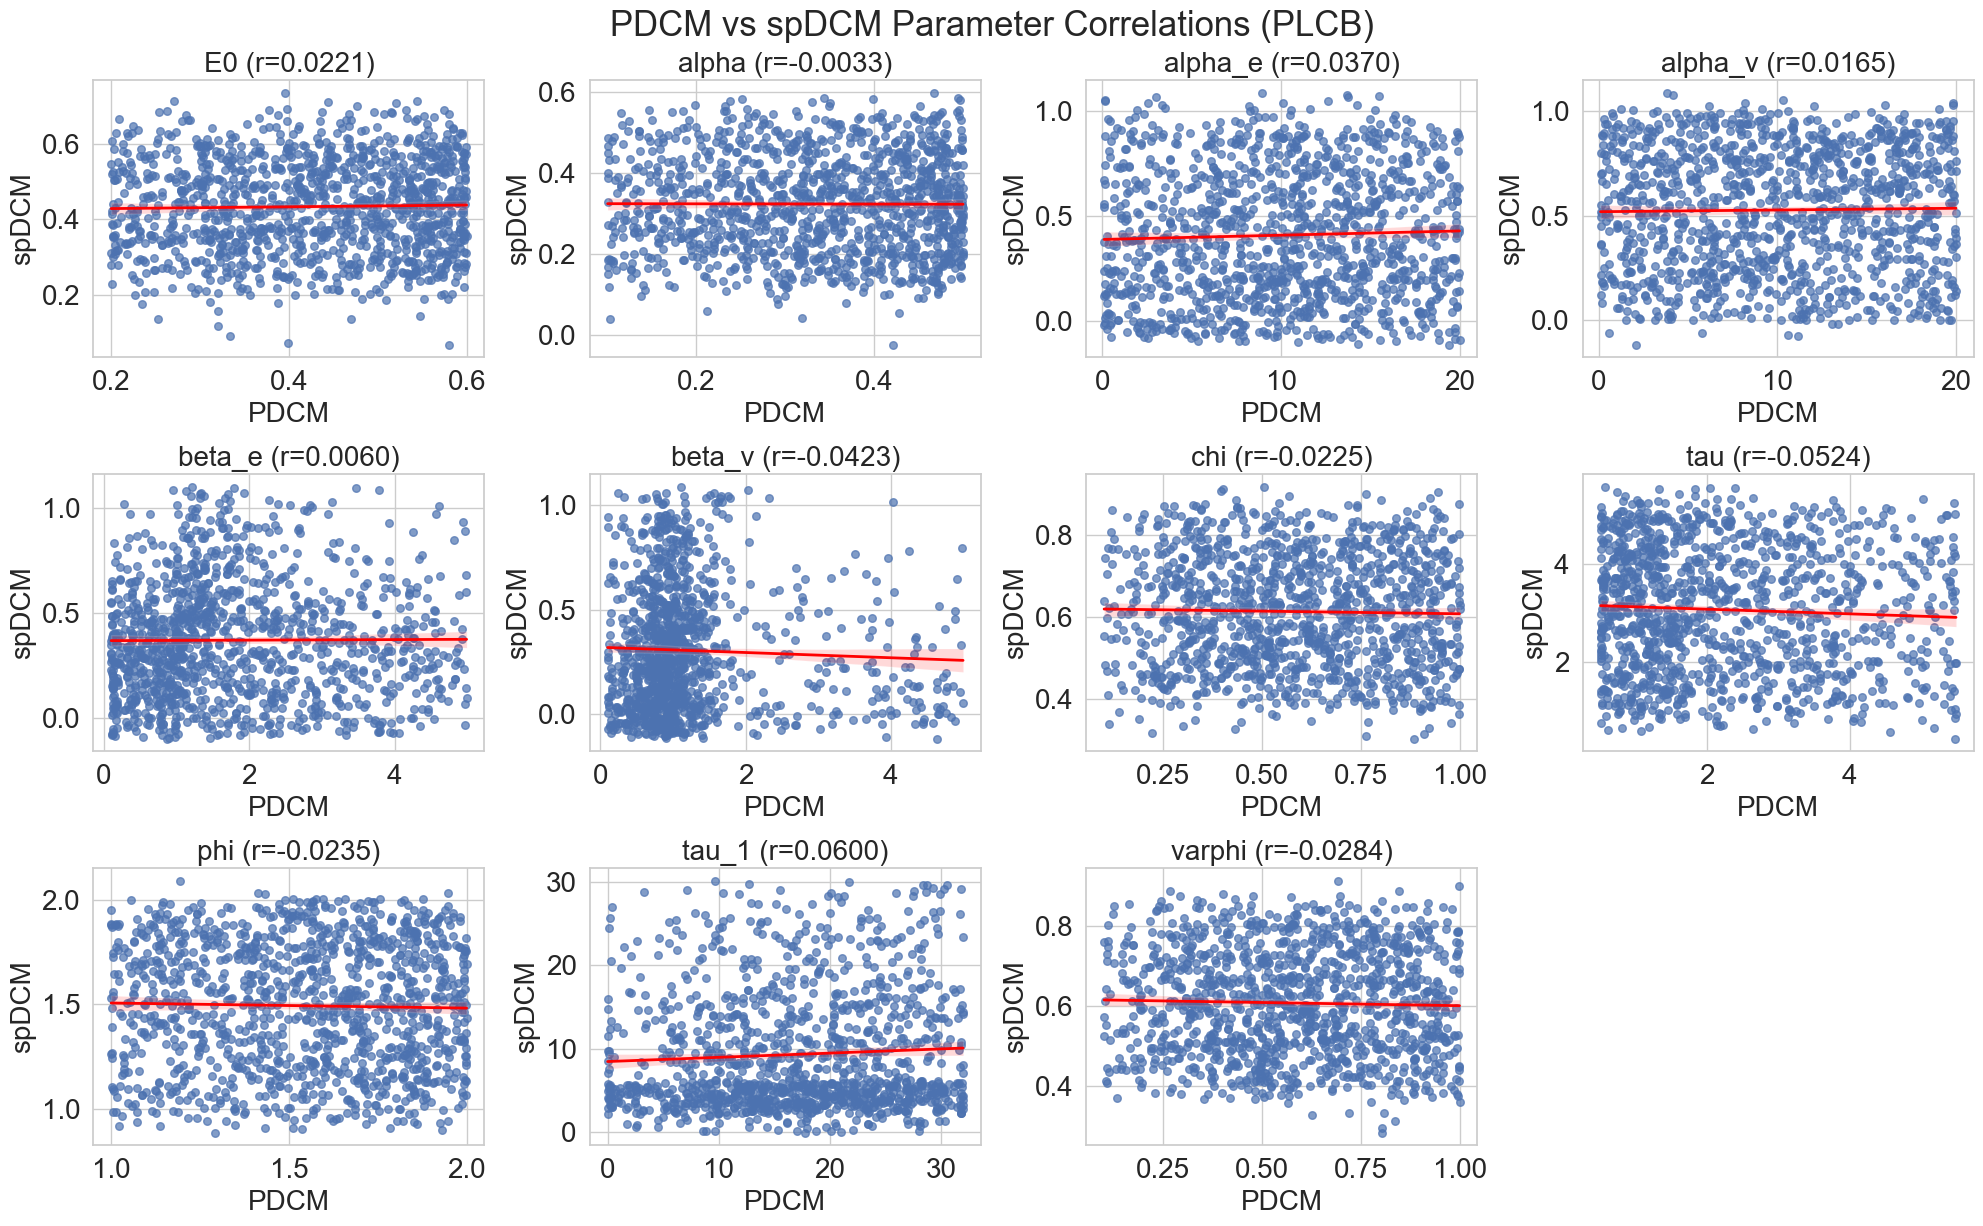


Condition: LSD
   parameter  pearson_r  p_value
0         E0    -0.0412   0.1514
1      alpha     0.0071   0.8037
2    alpha_e     0.0399   0.1642
3    alpha_v    -0.0139   0.6284
4     beta_e     0.0248   0.3876
5     beta_v    -0.0994   0.0005
6        chi    -0.0222   0.4395
7        mtt    -0.0429   0.1356
8        phi    -0.0091   0.7505
9        tau     0.0068   0.8141
10    varphi    -0.0590   0.0399


/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_5365/1869118449.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cond[f"{param}_PDCM"] = pd.to_numeric(df_cond[f"{param}_PDCM"], errors='coerce')
/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_5365/1869118449.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cond[f"{param}_spDCM"] = pd.to_numeric(df_cond[f"{param}_spDCM"], errors='coerce')


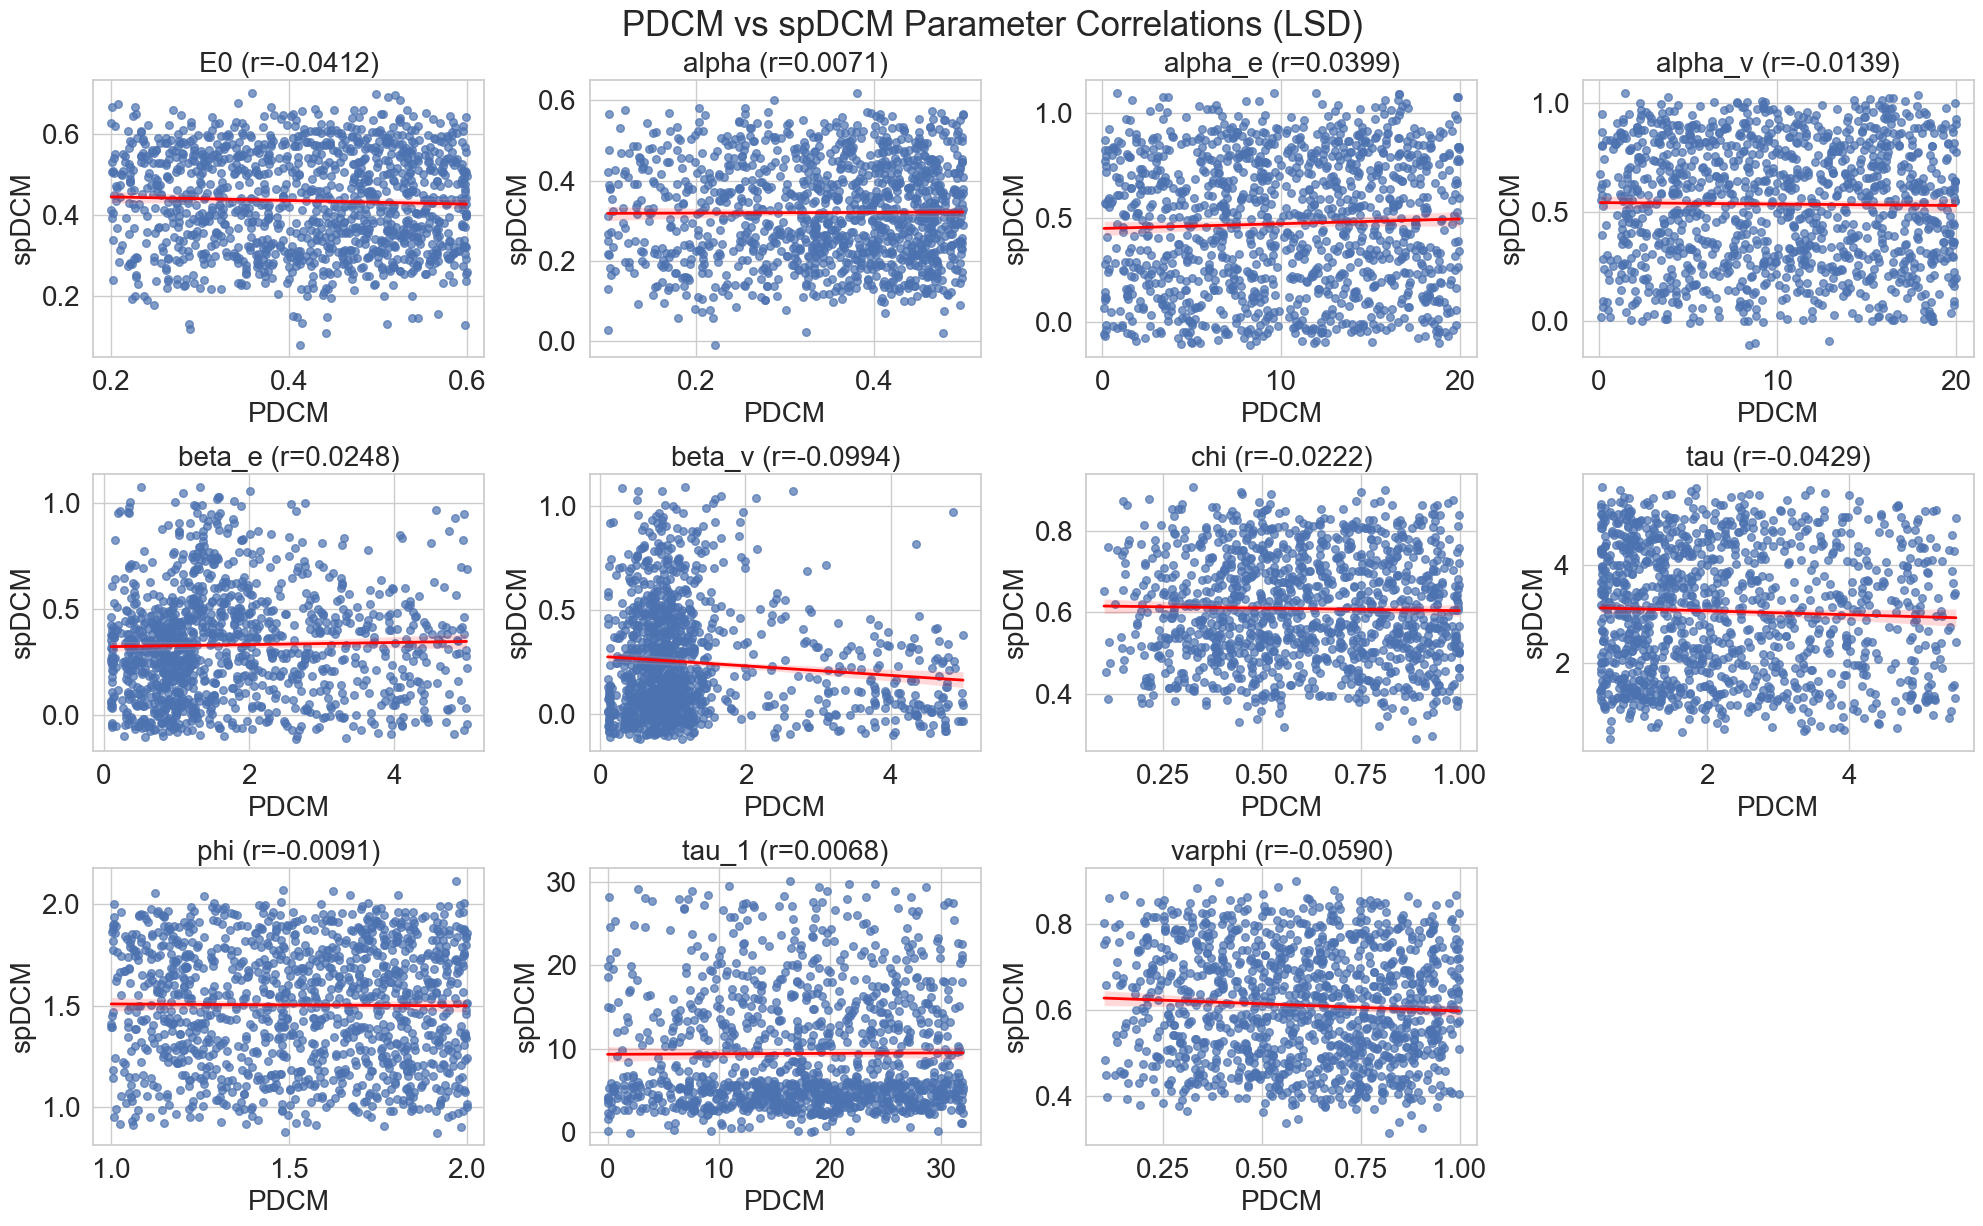

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

pdf = pd.read_csv("pdcm_all_data.csv")
sdf = pd.read_csv("spdcm_all_data.csv")

pdf = pdf[["subject", "roi", "experiment", "parameter", "value"]].dropna()
sdf = sdf[["subject", "roi", "experiment", "parameter", "value"]].dropna()

pdf_wide = pdf.pivot_table(index=["subject", "roi", "experiment"], columns="parameter", values="value").reset_index()
sdf_wide = sdf.pivot_table(index=["subject", "roi", "experiment"], columns="parameter", values="value").reset_index()

pdf_wide = pdf_wide.rename(columns={"experiment": "condition"})
sdf_wide = sdf_wide.rename(columns={"experiment": "condition"})

merged = pd.merge(
    pdf_wide, sdf_wide,
    on=["subject", "roi", "condition"],
    suffixes=('_PDCM', '_spDCM')
)

for cond in ["PLCB", "LSD"]:
    print(f"\nCondition: {cond}")
    df_cond = merged[merged["condition"] == cond]

    common_params = sorted(set(col.split('_PDCM')[0] for col in df_cond.columns if col.endswith('_PDCM')) &
                           set(col.split('_spDCM')[0] for col in df_cond.columns if col.endswith('_spDCM')))


    for param in common_params:
        df_cond[f"{param}_PDCM"] = pd.to_numeric(df_cond[f"{param}_PDCM"], errors='coerce')
        df_cond[f"{param}_spDCM"] = pd.to_numeric(df_cond[f"{param}_spDCM"], errors='coerce')

    correlations = []
    for param in common_params:
        x = df_cond[f"{param}_PDCM"]
        y = df_cond[f"{param}_spDCM"]
        valid = x.notna() & y.notna()
        x_valid = x[valid]
        y_valid = y[valid]

        if len(x_valid) > 1:
            r, p = pearsonr(x_valid, y_valid)
            correlations.append({
                "parameter": param,
                "pearson_r": round(r, 4),
                "p_value": round(p, 4)
            })

    correlation_df = pd.DataFrame(correlations)
    print(correlation_df)

    sns.set(style="whitegrid")
    n_params = len(common_params)
    n_cols = 4
    n_rows = (n_params + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    param_display_names = {
    "tau": "tau_1",
    "mtt": "tau"
    }
    
    plot_idx = 0
    for param in common_params:
        x = df_cond[f"{param}_PDCM"]
        y = df_cond[f"{param}_spDCM"]
        valid = x.notna() & y.notna()
        x_valid = x[valid]
        y_valid = y[valid]
    
        if len(x_valid) > 1:
            r, _ = pearsonr(x_valid, y_valid)
            sns.regplot(
                x=x_valid, y=y_valid, ax=axes[plot_idx],
                scatter_kws={'s': 30, 'alpha': 0.7},
                line_kws={'color': 'red', 'linewidth': 2}
            )
            display_name = param_display_names.get(param, param)
            axes[plot_idx].set_title(f"{display_name} (r={r:.4f})", fontsize=20)
            axes[plot_idx].set_xlabel("PDCM", fontsize=20)
            axes[plot_idx].set_ylabel("spDCM", fontsize=20)
            axes[plot_idx].tick_params(axis='both', labelsize=20)
            plot_idx += 1
    


    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.suptitle(f"PDCM vs spDCM Parameter Correlations ({cond})", fontsize=25, y=1.02)
    plt.show()


Correlation Table Across PLCB + LSD 
   parameter  pearson_r  p_value  n_pairs
0         E0    -0.0089   0.6594     2429
1      alpha     0.0011   0.9564     2429
2    alpha_e     0.0396   0.0508     2429
3    alpha_v     0.0019   0.9265     2429
4     beta_e     0.0161   0.4281     2429
5     beta_v    -0.0748   0.0002     2429
6        chi    -0.0232   0.2525     2429
7        mtt    -0.0475   0.0192     2429
8        phi    -0.0166   0.4148     2429
9        tau     0.0335   0.0987     2429
10    varphi    -0.0429   0.0346     2429


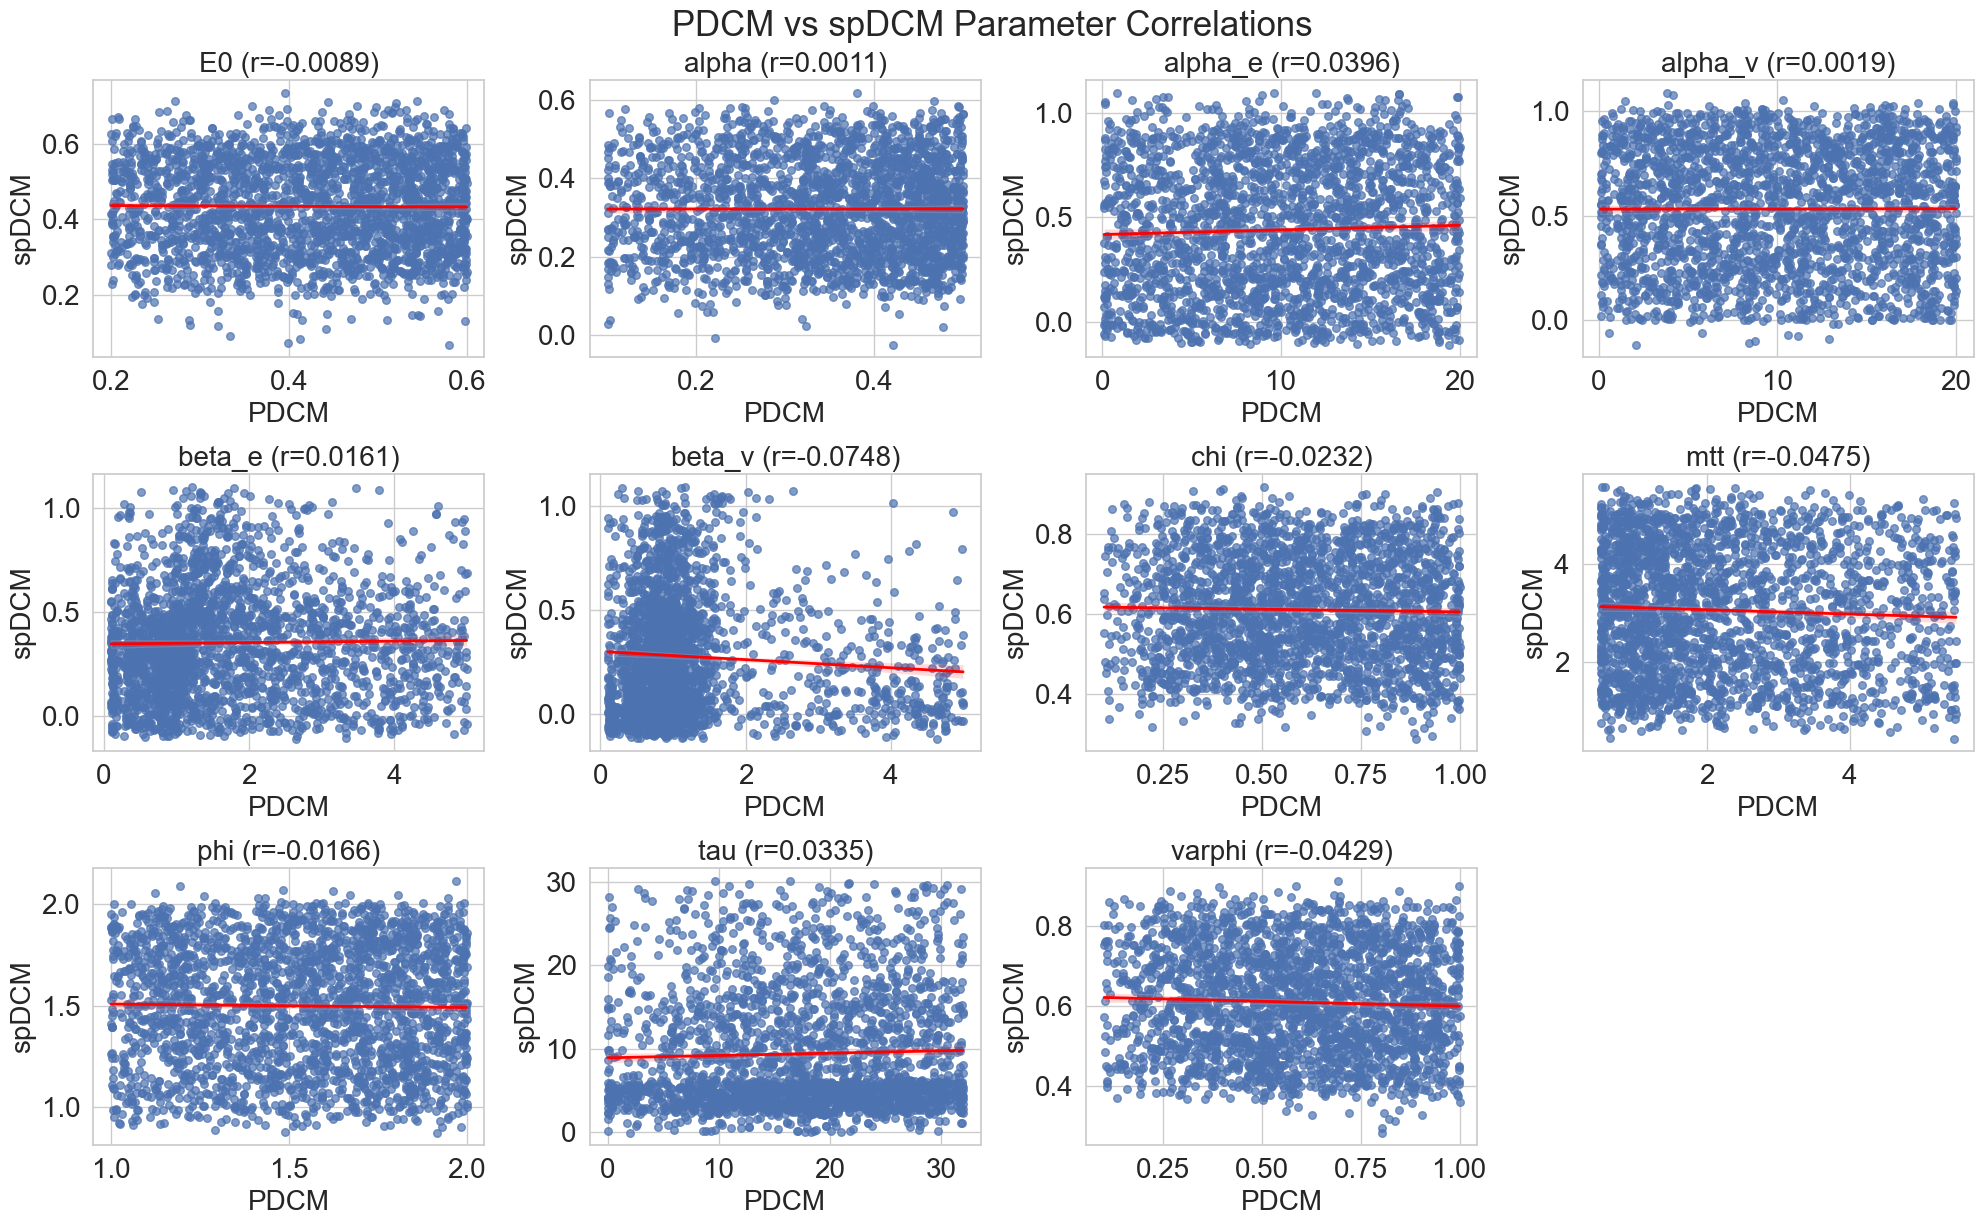

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

pdf = pd.read_csv("pdcm_all_data.csv")
sdf = pd.read_csv("spdcm_all_data.csv")


pdf = pdf[["subject", "roi", "experiment", "parameter", "value"]].dropna()
sdf = sdf[["subject", "roi", "experiment", "parameter", "value"]].dropna()


pdf_wide = pdf.pivot_table(index=["subject", "roi", "experiment"], columns="parameter", values="value").reset_index()
sdf_wide = sdf.pivot_table(index=["subject", "roi", "experiment"], columns="parameter", values="value").reset_index()


pdf_wide = pdf_wide.rename(columns={"experiment": "condition"})
sdf_wide = sdf_wide.rename(columns={"experiment": "condition"})


merged = pd.merge(
    pdf_wide, sdf_wide,
    on=["subject", "roi", "condition"],
    suffixes=('_PDCM', '_spDCM')
)


common_params = sorted(set(col.split('_PDCM')[0] for col in merged.columns if col.endswith('_PDCM')) &
                       set(col.split('_spDCM')[0] for col in merged.columns if col.endswith('_spDCM')))


for param in common_params:
    merged[f"{param}_PDCM"] = pd.to_numeric(merged[f"{param}_PDCM"], errors='coerce')
    merged[f"{param}_spDCM"] = pd.to_numeric(merged[f"{param}_spDCM"], errors='coerce')


correlations = []
for param in common_params:
    x = merged[f"{param}_PDCM"]
    y = merged[f"{param}_spDCM"]
    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) > 1:
        r, p = pearsonr(x_valid, y_valid)
        correlations.append({
            "parameter": param,
            "pearson_r": round(r, 4),
            "p_value": round(p, 4),
            "n_pairs": len(x_valid)
        })

correlation_df = pd.DataFrame(correlations)
print("Correlation Table Across PLCB + LSD ")
print(correlation_df)


sns.set(style="whitegrid")
n_params = len(common_params)
n_cols = 4
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

plot_idx = 0
for param in common_params:
    x = merged[f"{param}_PDCM"]
    y = merged[f"{param}_spDCM"]
    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) > 1:
        r, _ = pearsonr(x_valid, y_valid)
        sns.regplot(
          x=x_valid, y=y_valid, ax=axes[plot_idx],
             scatter_kws={'s': 30, 'alpha': 0.7},
            line_kws={'color': 'red', 'linewidth': 2}
         )
        axes[plot_idx].set_title(f"{param} (r={r:.4f})", fontsize=20)
        axes[plot_idx].set_xlabel("PDCM", fontsize=20)
        axes[plot_idx].set_ylabel("spDCM", fontsize=20)
        axes[plot_idx].tick_params(axis='both', labelsize=20)
        plot_idx += 1

for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.suptitle("PDCM vs spDCM Parameter Correlations", fontsize=25, y=1.02)
plt.show()
